In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Leer datos
filename = 'data/modifiedBostonHousing.csv'
df = pd.read_csv(filename)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df = df.loc[ : , ['RM','LSTAT','PTRATIO','price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [5]:
df.shape

(506, 4)

In [6]:
df.isnull().sum()# el método .isnull() de pandas es un alias del método .isna()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [8]:
df = df.dropna(how = 'any')
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [10]:
df.corr()

,RM,LSTAT,PTRATIO,price
RM,1.000000,-0.614889,-0.356013,0.143347
LSTAT,-0.614889,1.000000,0.372996,-0.027292
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
price,0.143347,-0.027292,-0.187262,1.000000


In [11]:
df.corr().sort_values(by='price')

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


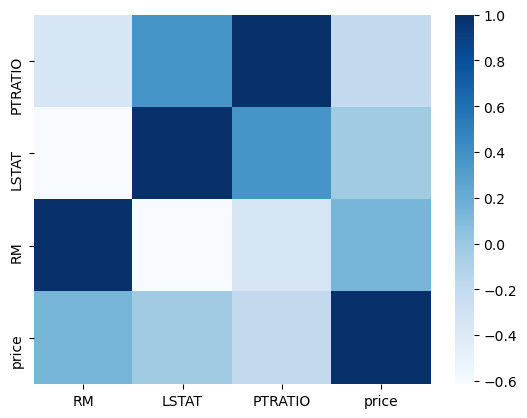

In [20]:
plt.style.use('default')
sns.heatmap(df.corr().sort_values(by='price'), cmap='Blues')

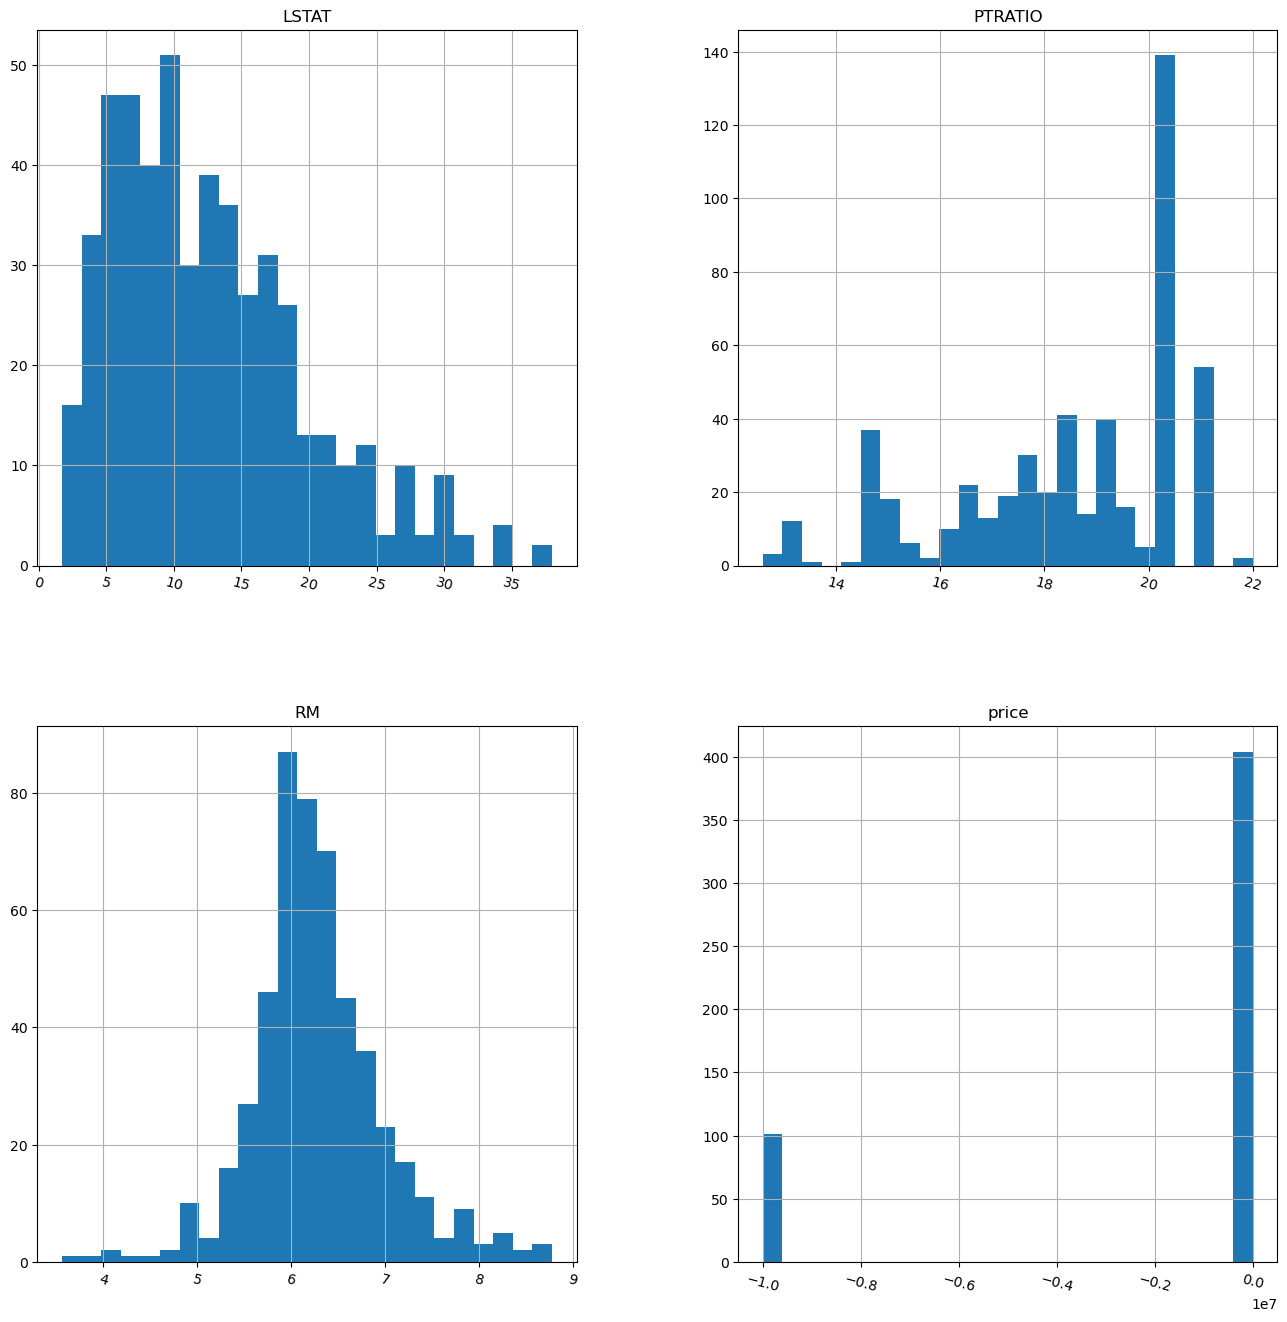

In [19]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

In [25]:
filtroPrecioNegativo = df.loc[ : , 'price'] < 0
df = df.loc[~filtroPrecioNegativo, : ]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


C:\ProgramData\Anaconda3\envs\env36\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\envs\env36\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\envs\env36\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\envs\env36\lib\site-packages\pandas\plot

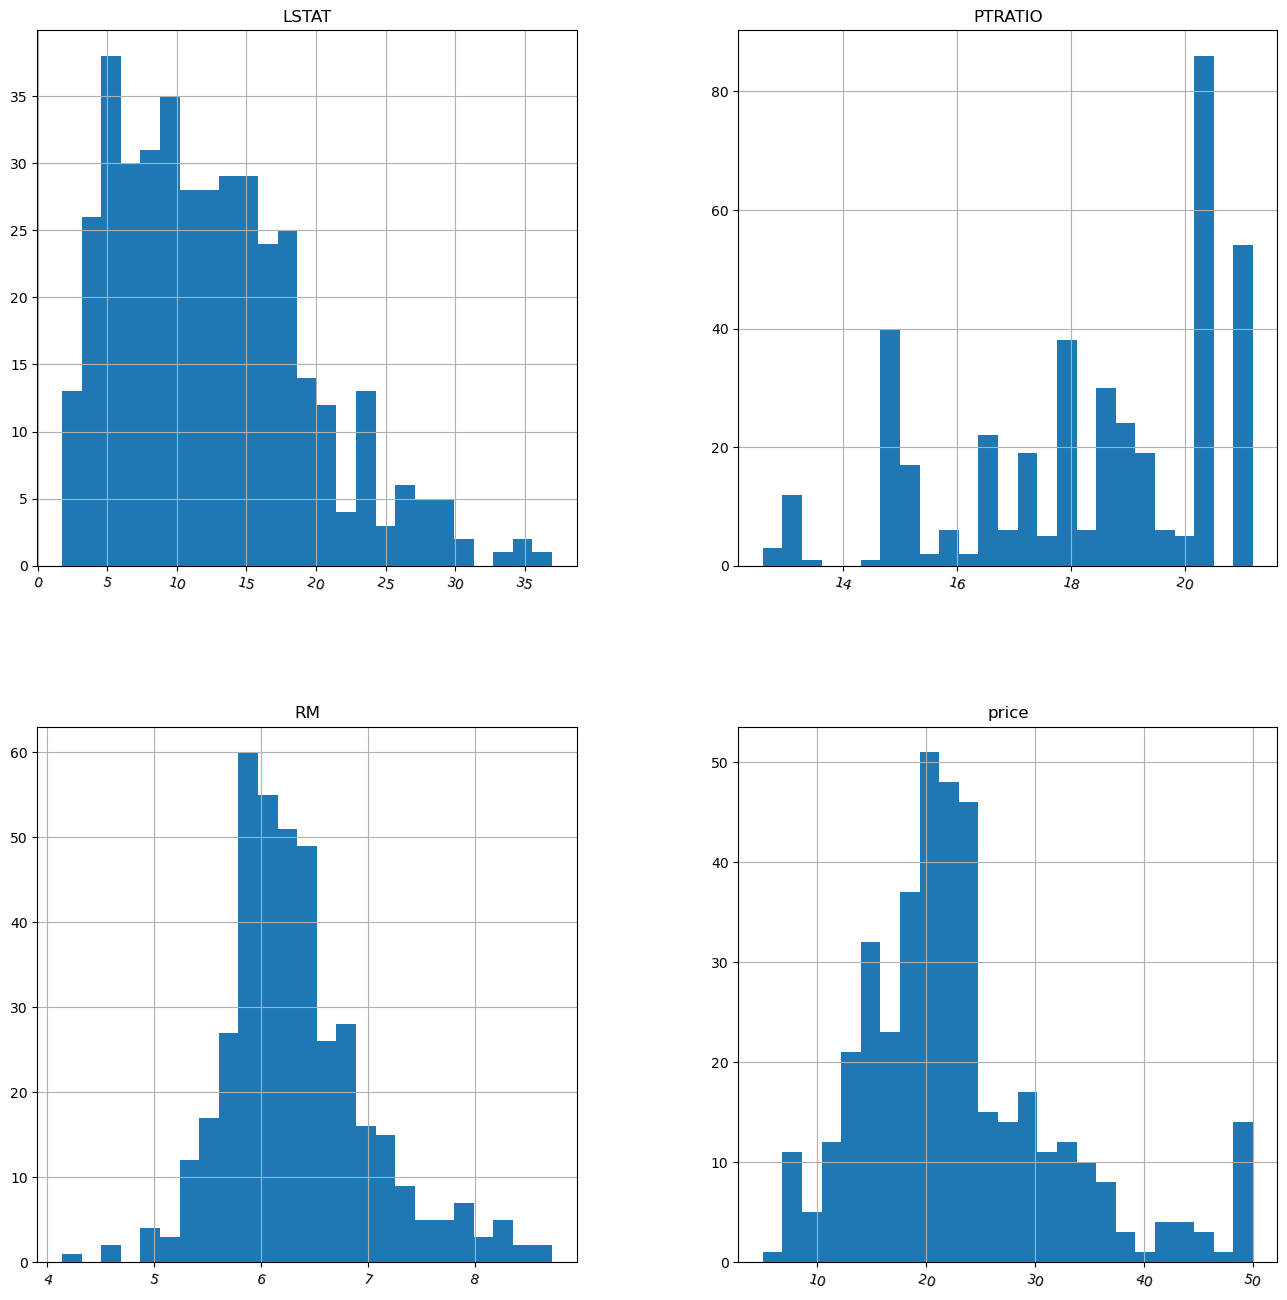

In [26]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

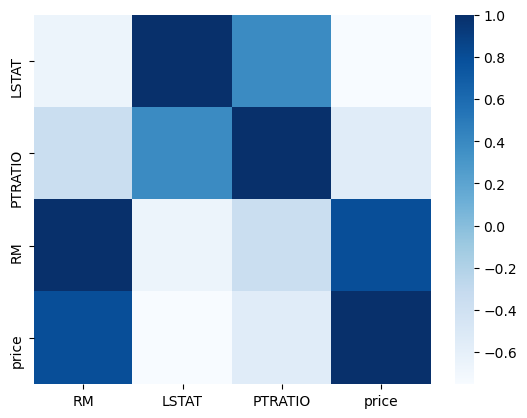

In [31]:
sns.heatmap(df.corr().sort_values(by = 'price'), cmap='Blues')

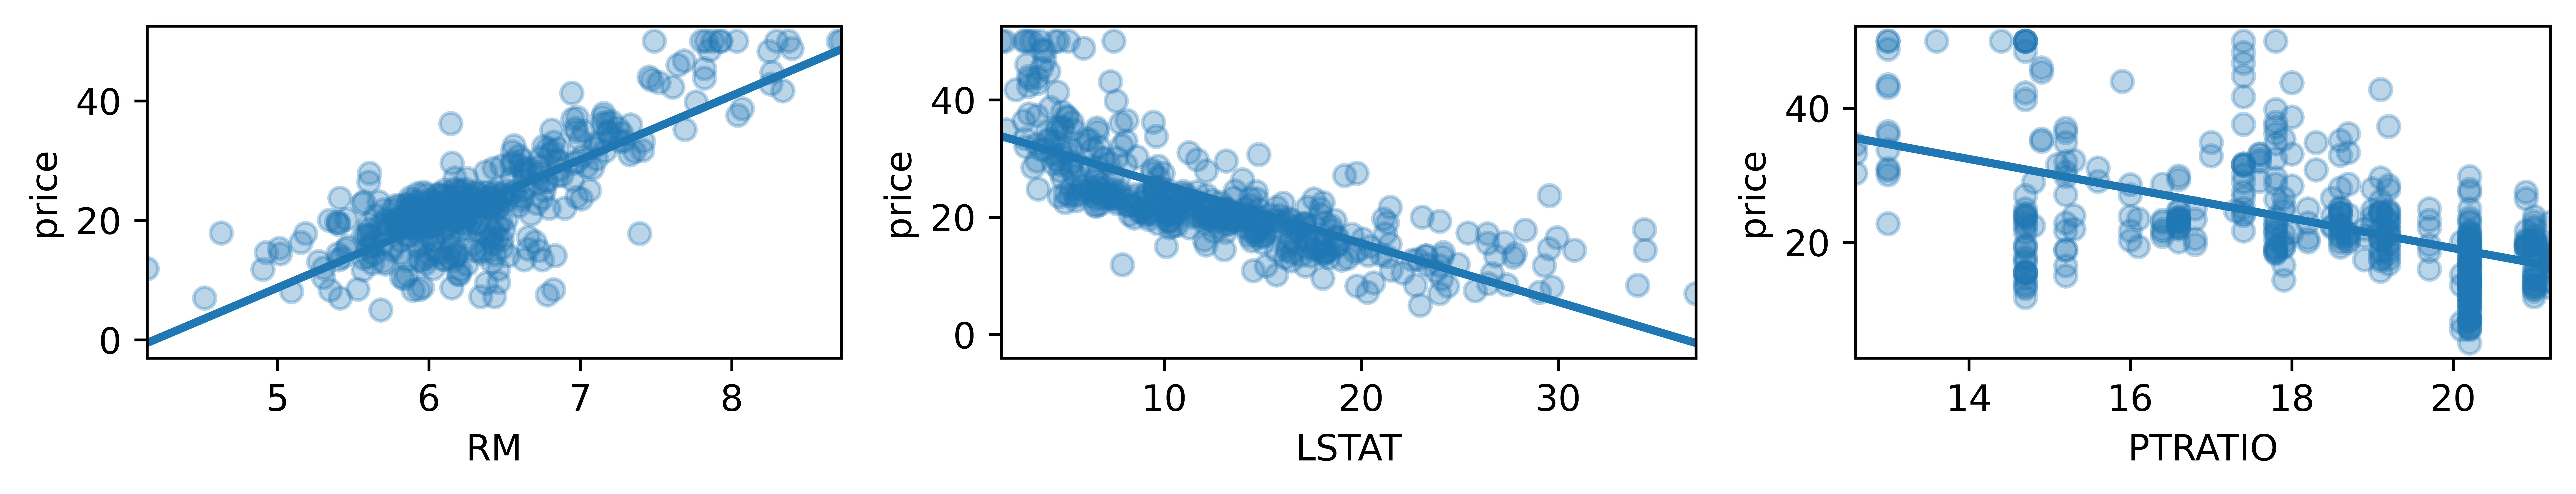

In [33]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [35]:
# Utilizando scikitlearn
X = df.loc[:, ['RM', 'LSTAT', 'PTRATIO']].values
X.shape

(404, 3)

In [38]:
y = df.loc[:,'price'].values
y.shape

(404,)

In [40]:
reg = LinearRegression(fit_intercept = True)
reg.fit(X,y)

LinearRegression()

In [58]:
reg.predict(X[0].reshape(-1,3)) #[[val1,val2,val3]]


array([30.93692265])

In [55]:
reg.predict(X[0:10])


array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       [ 6.998,  2.94 , 18.7  ],
       [ 7.147,  5.33 , 18.7  ],
       [ 6.43 ,  5.21 , 18.7  ],
       [ 6.012, 12.43 , 15.2  ],
       [ 6.172, 19.15 , 15.2  ],
       [ 5.631, 29.93 , 15.2  ],
       [ 6.004, 17.1  , 15.2  ]])

In [59]:
reg.score(X,y)

0.7848414273030437

In [60]:
reg.coef_

array([ 6.61452725, -0.44571061, -1.00672009])

In [61]:
reg.intercept_

5.068862183051447

In [62]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]

b = reg.intercept_

In [66]:
print("Fórmula: y = {:.2f} +  {:.2f}*RM + {:.2f}*LSTAT + {:.2f}*PTRATIO".format(b,m1,2,m3))

Fórmula: y = 5.07 +  6.61*RM + 2.00*LSTAT + -1.01*PTRATIO
